# Coding Test: Data Preparation

### Importing Data dan Inspection

In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 

### Data Cleansing

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null 

### Churn Customers

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[n

### Menghapus kolom yang tidak diperlukan

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Average_Transaction_Amount Count_Transaction
0        29531   Jaket  ...                    1467681                22
1        29531  Sepatu  ...                    1269337                41
2       141526     Tas  ...                     310915                30
3       141526   Jaket  ...                     722632                27
4        37545  Sepatu  ...                    1775036                25

[5 rows x 6 columns]


# Coding Test: Data Visualization

### Customer acquisition by year

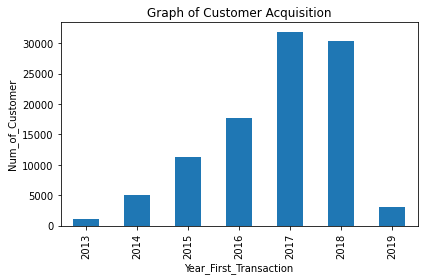

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Transaction by year

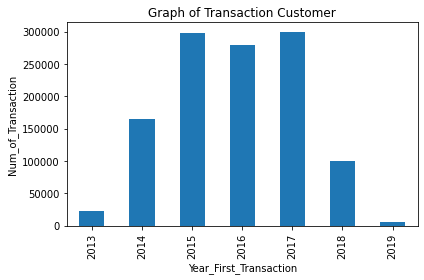

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average transaction amount by year

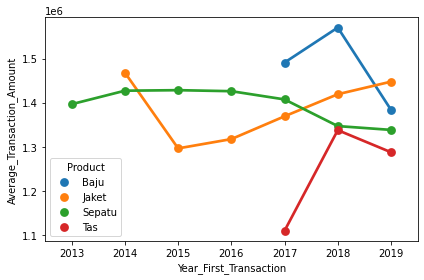

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### Proporsi churned customer untuk setiap produk

<Figure size 432x288 with 0 Axes>

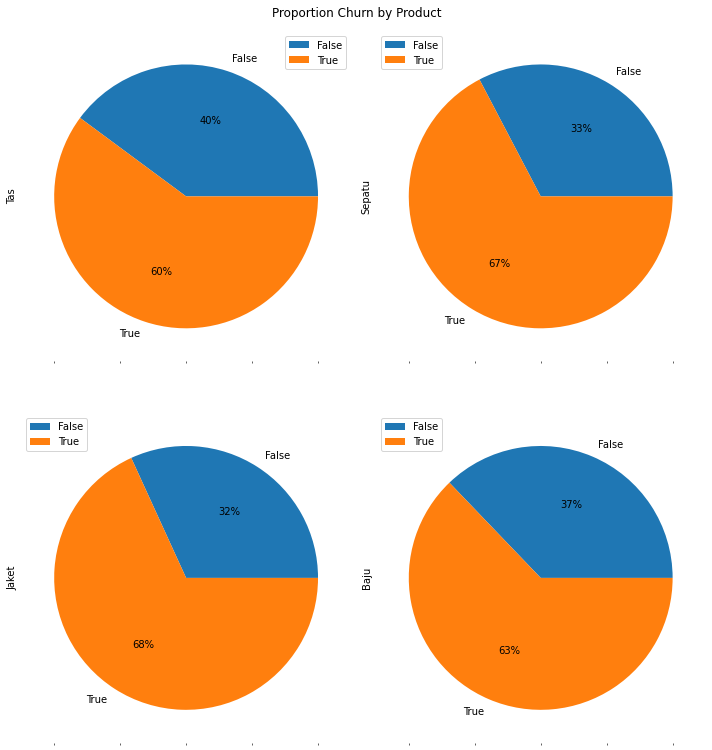

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 11),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi count transaction

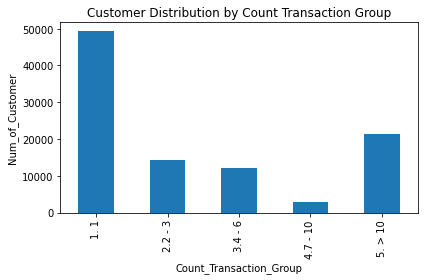

In [8]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val = '2.2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val = '3.4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val = '4.7 - 10'
    else:
        val = '5. > 10'
    return val

# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi average transaction amount

<Figure size 432x288 with 0 Axes>

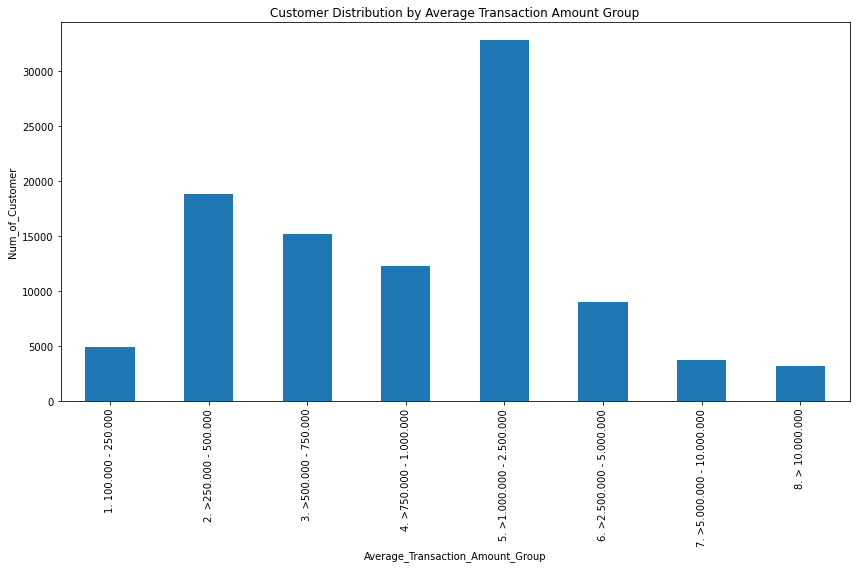

In [8]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val = '1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. > 10.000.000'
    return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

plt.figure(figsize=(12,8))
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Coding Test: Modelling

### Feature Columns dan Target

In [5]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

### Split X dan y ke dalam bagian training dan testing

In [6]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns] 
y = df['is_churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

### Train, predict dan evaluate

In [3]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Mengubah variabel target menjadi integer
df.is_churn[df['is_churn'] == 'False'] = 0
df.is_churn[df['is_churn'] == 'True'] = 1
df['is_churn'] = df['is_churn'].astype('int')

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

for i,x in enumerate(y_pred):
    y_pred[i]=x.astype('int')

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


### Visualisasi Confusion Matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

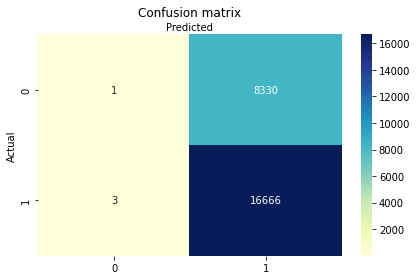

In [5]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Mengubah variabel target menjadi integer
df.is_churn[df['is_churn'] == 'False'] = 0
df.is_churn[df['is_churn'] == 'True'] = 1
df['is_churn'] = df['is_churn'].astype('int')

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Accuracy, Precision, dan Recall

In [7]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Mengubah variabel target menjadi integer
df.is_churn[df['is_churn'] == 'False'] = 0
df.is_churn[df['is_churn'] == 'True'] = 1
df['is_churn'] = df['is_churn'].astype('int')

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
